In [11]:
#import tensorflow as tf
import numpy as np
import pandas as pd
import scipy as sp
from scipy.stats import chi2
from math import floor
from joblib import Parallel, delayed
from sklearn.svm import LinearSVC
import random
import os
from sklearn.metrics import precision_recall_fscore_support as full_score
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt

In [12]:
log_directory="/home/sdelrio/alarm_datasets/log_results/mmpc_partitioned"

In [112]:
#recovering results
# recovery_files = ['/scored_true-mb_log.txt',
#                   '/scored_entropy-mi_log.txt',
#                   '/scored_ttest_log.txt',
#                   '/scored_supercpc_log.txt'
#                  ]
recovery_files = [#'/scored_svm_entropy-mi_log.txt',
                  '/scored_nb_entropy-mi_log.txt',
                  #'/scored_svm_supercpc_log.txt',
                  '/scored_nb_ttest_log.txt',
                  #'/scored_svm_ttest_log.txt',
                  '/scored_nb_supercpc_log.txt',
                  #'/scored_svm_true-pc_log.txt',
                  '/scored_nb_true-pc_log.txt',
                  #'/scored_svm_true-mb_log.txt',
                  '/scored_nb_true-mb_log.txt'
                 ]
recovery_arr = []
for f_name in recovery_files:
    ff = open(log_directory+f_name,'r')
    #line_rec_scor =  ff.read().split('\n')[0].split(';')
    recovery_scored_file=[]
    for line in ff.read().split('\n'):
        line_arr=[]
        line_rec_scor=line.split(';')
        node_dict={}
        if (len(line_rec_scor[0])==0):
            continue
        node_dict['TargetNode']=line_rec_scor[1]
        node_dict['supercpc']=line_rec_scor[2].split('_')
        node_dict['class_precisions']=[]
        line_arr.append(line_rec_scor[0])
        
        for i in range(0,len(line_rec_scor[3].split('_')),4):
            if (len(line_rec_scor[3].split('_')[i:i+3][0])==0):
                continue
            acc_arr=[]
            #print(line_rec_scor[3])
            acc_arr.append([float(x) for x in line_rec_scor[3].split('_')[i+3].split('\t')[:3]])
            try:
                acc_arr.append([float(x) for x in line_rec_scor[3].split('_')[i+3].split('\t')[3:6]])
            except:
                print(line_rec_scor[3].split('_')[i+3].split('\t')[3:6])
            node_dict['class_precisions'].append([acc_arr,line_rec_scor[3].split('_')[i]+'_'+line_rec_scor[3].split('_')[i+1]+'_'+line_rec_scor[3].split('_')[i+2]])
        line_arr.append(node_dict)
        recovery_scored_file.append(line_arr)
    recovery_arr.append([f_name,recovery_scored_file])
    ff.close()

    

['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']
['']


In [109]:
# recovering preselected nodes
main_directory= '/home/sdelrio/alarm_datasets/Alarm10/'
save_folder='/home/sdelrio/alarm_datasets/log_results/'

if not os.path.exists(main_directory):
    print("Bad routing.")
preselected_nodes=[] # will have [node_str,balance_ranking]
# so far, we need Node, size of estimated pc set per filename, balance ranking
ff = open(save_folder+'mmpc_partitioned/alarm10_binary_nodes_selected.txt','r')
for e in ff.read().split('\n'):
    spl_line = e.split(';')
    if (len(spl_line[0])==0):
        continue
    preselected_nodes.append([spl_line[0],float(spl_line[1])])
ff.close()

In [113]:
# processing results
sample_sizes = ['s500','s1000','s5000']

balance_ranking = []
set_length_ranking = []

for results_arr in recovery_arr:
    test_name = results_arr[0].split('_log')[0]
    for sample_size in sample_sizes:
        bl_sorted = sorted([x for x in results_arr[1]
                               if x[0].split('_')[1] == sample_size],\
                           key=lambda x: x[1]['TargetNode'])
        evaluated_nodes = []
        
        for e in bl_sorted:
            if ('@' in e[1]['TargetNode']):
                e[1]['TargetNode']=e[1]['TargetNode'].split('@')[0]
            
            if (e[1]['TargetNode'] in evaluated_nodes) or\
                (e[1]['TargetNode'] not in [x[0].split('@')[0] for x in preselected_nodes]):
                continue
            
            print('Retrieving results from test '+test_name+', Target '+e[1]['TargetNode']+', with sample size of '+sample_size)
            evaluated_nodes.append(e[1]['TargetNode'])
            
            b_rank = [x[1] for x in preselected_nodes if x[0].split('@')[0]==e[1]['TargetNode']][0]
            g_rank = []
            for sub_e in [x for x in bl_sorted if x[1]['TargetNode'] == e[1]['TargetNode']]:
                for prec in sub_e[1]['class_precisions']:
                    g_rank.append(g_mean(prec[0]))
            balance_ranking.append([test_name,sample_size,e[1]['TargetNode'],b_rank,sum(g_rank)/len(g_rank)])
            set_length_ranking.append([test_name, sample_size,e[1]['TargetNode'], len(e[1]['supercpc']),sum(g_rank)/len(g_rank)])

Retrieving results from test /scored_nb_entropy-mi, Target Node101, with sample size of s500
Retrieving results from test /scored_nb_entropy-mi, Target Node102, with sample size of s500
Retrieving results from test /scored_nb_entropy-mi, Target Node104, with sample size of s500
Retrieving results from test /scored_nb_entropy-mi, Target Node105, with sample size of s500
Retrieving results from test /scored_nb_entropy-mi, Target Node11, with sample size of s500
Retrieving results from test /scored_nb_entropy-mi, Target Node110, with sample size of s500
Retrieving results from test /scored_nb_entropy-mi, Target Node111, with sample size of s500
Retrieving results from test /scored_nb_entropy-mi, Target Node117, with sample size of s500
Retrieving results from test /scored_nb_entropy-mi, Target Node120, with sample size of s500
Retrieving results from test /scored_nb_entropy-mi, Target Node122, with sample size of s500
Retrieving results from test /scored_nb_entropy-mi, Target Node125, wit

Retrieving results from test /scored_nb_entropy-mi, Target Node57, with sample size of s500
Retrieving results from test /scored_nb_entropy-mi, Target Node6, with sample size of s500
Retrieving results from test /scored_nb_entropy-mi, Target Node61, with sample size of s500
Retrieving results from test /scored_nb_entropy-mi, Target Node64, with sample size of s500
Retrieving results from test /scored_nb_entropy-mi, Target Node65, with sample size of s500
Retrieving results from test /scored_nb_entropy-mi, Target Node67, with sample size of s500
Retrieving results from test /scored_nb_entropy-mi, Target Node68, with sample size of s500
Retrieving results from test /scored_nb_entropy-mi, Target Node73, with sample size of s500
Retrieving results from test /scored_nb_entropy-mi, Target Node74, with sample size of s500
Retrieving results from test /scored_nb_entropy-mi, Target Node80, with sample size of s500
Retrieving results from test /scored_nb_entropy-mi, Target Node83, with sample si

Retrieving results from test /scored_nb_entropy-mi, Target Node326, with sample size of s1000
Retrieving results from test /scored_nb_entropy-mi, Target Node327, with sample size of s1000
Retrieving results from test /scored_nb_entropy-mi, Target Node332, with sample size of s1000
Retrieving results from test /scored_nb_entropy-mi, Target Node333, with sample size of s1000
Retrieving results from test /scored_nb_entropy-mi, Target Node339, with sample size of s1000
Retrieving results from test /scored_nb_entropy-mi, Target Node342, with sample size of s1000
Retrieving results from test /scored_nb_entropy-mi, Target Node344, with sample size of s1000
Retrieving results from test /scored_nb_entropy-mi, Target Node347, with sample size of s1000
Retrieving results from test /scored_nb_entropy-mi, Target Node350, with sample size of s1000
Retrieving results from test /scored_nb_entropy-mi, Target Node353, with sample size of s1000
Retrieving results from test /scored_nb_entropy-mi, Target N

Retrieving results from test /scored_nb_entropy-mi, Target Node289, with sample size of s5000
Retrieving results from test /scored_nb_entropy-mi, Target Node290, with sample size of s5000
Retrieving results from test /scored_nb_entropy-mi, Target Node295, with sample size of s5000
Retrieving results from test /scored_nb_entropy-mi, Target Node296, with sample size of s5000
Retrieving results from test /scored_nb_entropy-mi, Target Node30, with sample size of s5000
Retrieving results from test /scored_nb_entropy-mi, Target Node302, with sample size of s5000
Retrieving results from test /scored_nb_entropy-mi, Target Node305, with sample size of s5000
Retrieving results from test /scored_nb_entropy-mi, Target Node307, with sample size of s5000
Retrieving results from test /scored_nb_entropy-mi, Target Node31, with sample size of s5000
Retrieving results from test /scored_nb_entropy-mi, Target Node310, with sample size of s5000
Retrieving results from test /scored_nb_entropy-mi, Target Nod

Retrieving results from test /scored_nb_ttest, Target Node228, with sample size of s500
Retrieving results from test /scored_nb_ttest, Target Node231, with sample size of s500
Retrieving results from test /scored_nb_ttest, Target Node233, with sample size of s500
Retrieving results from test /scored_nb_ttest, Target Node236, with sample size of s500
Retrieving results from test /scored_nb_ttest, Target Node239, with sample size of s500
Retrieving results from test /scored_nb_ttest, Target Node24, with sample size of s500
Retrieving results from test /scored_nb_ttest, Target Node242, with sample size of s500
Retrieving results from test /scored_nb_ttest, Target Node246, with sample size of s500
Retrieving results from test /scored_nb_ttest, Target Node249, with sample size of s500
Retrieving results from test /scored_nb_ttest, Target Node250, with sample size of s500
Retrieving results from test /scored_nb_ttest, Target Node252, with sample size of s500
Retrieving results from test /sco

Retrieving results from test /scored_nb_ttest, Target Node179, with sample size of s1000
Retrieving results from test /scored_nb_ttest, Target Node184, with sample size of s1000
Retrieving results from test /scored_nb_ttest, Target Node185, with sample size of s1000
Retrieving results from test /scored_nb_ttest, Target Node191, with sample size of s1000
Retrieving results from test /scored_nb_ttest, Target Node194, with sample size of s1000
Retrieving results from test /scored_nb_ttest, Target Node196, with sample size of s1000
Retrieving results from test /scored_nb_ttest, Target Node199, with sample size of s1000
Retrieving results from test /scored_nb_ttest, Target Node20, with sample size of s1000
Retrieving results from test /scored_nb_ttest, Target Node202, with sample size of s1000
Retrieving results from test /scored_nb_ttest, Target Node205, with sample size of s1000
Retrieving results from test /scored_nb_ttest, Target Node209, with sample size of s1000
Retrieving results fro

Retrieving results from test /scored_nb_ttest, Target Node165, with sample size of s5000
Retrieving results from test /scored_nb_ttest, Target Node168, with sample size of s5000
Retrieving results from test /scored_nb_ttest, Target Node17, with sample size of s5000
Retrieving results from test /scored_nb_ttest, Target Node172, with sample size of s5000
Retrieving results from test /scored_nb_ttest, Target Node175, with sample size of s5000
Retrieving results from test /scored_nb_ttest, Target Node176, with sample size of s5000
Retrieving results from test /scored_nb_ttest, Target Node178, with sample size of s5000
Retrieving results from test /scored_nb_ttest, Target Node179, with sample size of s5000
Retrieving results from test /scored_nb_ttest, Target Node184, with sample size of s5000
Retrieving results from test /scored_nb_ttest, Target Node185, with sample size of s5000
Retrieving results from test /scored_nb_ttest, Target Node191, with sample size of s5000
Retrieving results fro

Retrieving results from test /scored_nb_supercpc, Target Node162, with sample size of s500
Retrieving results from test /scored_nb_supercpc, Target Node165, with sample size of s500
Retrieving results from test /scored_nb_supercpc, Target Node168, with sample size of s500
Retrieving results from test /scored_nb_supercpc, Target Node17, with sample size of s500
Retrieving results from test /scored_nb_supercpc, Target Node172, with sample size of s500
Retrieving results from test /scored_nb_supercpc, Target Node175, with sample size of s500
Retrieving results from test /scored_nb_supercpc, Target Node176, with sample size of s500
Retrieving results from test /scored_nb_supercpc, Target Node178, with sample size of s500
Retrieving results from test /scored_nb_supercpc, Target Node179, with sample size of s500
Retrieving results from test /scored_nb_supercpc, Target Node184, with sample size of s500
Retrieving results from test /scored_nb_supercpc, Target Node185, with sample size of s500


Retrieving results from test /scored_nb_supercpc, Target Node110, with sample size of s1000
Retrieving results from test /scored_nb_supercpc, Target Node111, with sample size of s1000
Retrieving results from test /scored_nb_supercpc, Target Node117, with sample size of s1000
Retrieving results from test /scored_nb_supercpc, Target Node120, with sample size of s1000
Retrieving results from test /scored_nb_supercpc, Target Node122, with sample size of s1000
Retrieving results from test /scored_nb_supercpc, Target Node125, with sample size of s1000
Retrieving results from test /scored_nb_supercpc, Target Node128, with sample size of s1000
Retrieving results from test /scored_nb_supercpc, Target Node131, with sample size of s1000
Retrieving results from test /scored_nb_supercpc, Target Node135, with sample size of s1000
Retrieving results from test /scored_nb_supercpc, Target Node138, with sample size of s1000
Retrieving results from test /scored_nb_supercpc, Target Node139, with sample si

Retrieving results from test /scored_nb_supercpc, Target Node9, with sample size of s1000
Retrieving results from test /scored_nb_supercpc, Target Node91, with sample size of s1000
Retrieving results from test /scored_nb_supercpc, Target Node94, with sample size of s1000
Retrieving results from test /scored_nb_supercpc, Target Node98, with sample size of s1000
Retrieving results from test /scored_nb_supercpc, Target Node101, with sample size of s5000
Retrieving results from test /scored_nb_supercpc, Target Node102, with sample size of s5000
Retrieving results from test /scored_nb_supercpc, Target Node104, with sample size of s5000
Retrieving results from test /scored_nb_supercpc, Target Node105, with sample size of s5000
Retrieving results from test /scored_nb_supercpc, Target Node11, with sample size of s5000
Retrieving results from test /scored_nb_supercpc, Target Node110, with sample size of s5000
Retrieving results from test /scored_nb_supercpc, Target Node111, with sample size of 

Retrieving results from test /scored_nb_supercpc, Target Node43, with sample size of s5000
Retrieving results from test /scored_nb_supercpc, Target Node46, with sample size of s5000
Retrieving results from test /scored_nb_supercpc, Target Node48, with sample size of s5000
Retrieving results from test /scored_nb_supercpc, Target Node51, with sample size of s5000
Retrieving results from test /scored_nb_supercpc, Target Node54, with sample size of s5000
Retrieving results from test /scored_nb_supercpc, Target Node57, with sample size of s5000
Retrieving results from test /scored_nb_supercpc, Target Node6, with sample size of s5000
Retrieving results from test /scored_nb_supercpc, Target Node61, with sample size of s5000
Retrieving results from test /scored_nb_supercpc, Target Node64, with sample size of s5000
Retrieving results from test /scored_nb_supercpc, Target Node65, with sample size of s5000
Retrieving results from test /scored_nb_supercpc, Target Node67, with sample size of s5000


Retrieving results from test /scored_nb_true-pc, Target Node357, with sample size of s500
Retrieving results from test /scored_nb_true-pc, Target Node36, with sample size of s500
Retrieving results from test /scored_nb_true-pc, Target Node360, with sample size of s500
Retrieving results from test /scored_nb_true-pc, Target Node361, with sample size of s500
Retrieving results from test /scored_nb_true-pc, Target Node363, with sample size of s500
Retrieving results from test /scored_nb_true-pc, Target Node364, with sample size of s500
Retrieving results from test /scored_nb_true-pc, Target Node369, with sample size of s500
Retrieving results from test /scored_nb_true-pc, Target Node37, with sample size of s500
Retrieving results from test /scored_nb_true-pc, Target Node370, with sample size of s500
Retrieving results from test /scored_nb_true-pc, Target Node43, with sample size of s500
Retrieving results from test /scored_nb_true-pc, Target Node46, with sample size of s500
Retrieving res

Retrieving results from test /scored_nb_true-pc, Target Node295, with sample size of s1000
Retrieving results from test /scored_nb_true-pc, Target Node296, with sample size of s1000
Retrieving results from test /scored_nb_true-pc, Target Node30, with sample size of s1000
Retrieving results from test /scored_nb_true-pc, Target Node302, with sample size of s1000
Retrieving results from test /scored_nb_true-pc, Target Node305, with sample size of s1000
Retrieving results from test /scored_nb_true-pc, Target Node307, with sample size of s1000
Retrieving results from test /scored_nb_true-pc, Target Node31, with sample size of s1000
Retrieving results from test /scored_nb_true-pc, Target Node310, with sample size of s1000
Retrieving results from test /scored_nb_true-pc, Target Node313, with sample size of s1000
Retrieving results from test /scored_nb_true-pc, Target Node316, with sample size of s1000
Retrieving results from test /scored_nb_true-pc, Target Node320, with sample size of s1000
R

Retrieving results from test /scored_nb_true-pc, Target Node202, with sample size of s5000
Retrieving results from test /scored_nb_true-pc, Target Node205, with sample size of s5000
Retrieving results from test /scored_nb_true-pc, Target Node209, with sample size of s5000
Retrieving results from test /scored_nb_true-pc, Target Node212, with sample size of s5000
Retrieving results from test /scored_nb_true-pc, Target Node213, with sample size of s5000
Retrieving results from test /scored_nb_true-pc, Target Node215, with sample size of s5000
Retrieving results from test /scored_nb_true-pc, Target Node216, with sample size of s5000
Retrieving results from test /scored_nb_true-pc, Target Node221, with sample size of s5000
Retrieving results from test /scored_nb_true-pc, Target Node222, with sample size of s5000
Retrieving results from test /scored_nb_true-pc, Target Node228, with sample size of s5000
Retrieving results from test /scored_nb_true-pc, Target Node231, with sample size of s5000

Retrieving results from test /scored_nb_true-mb, Target Node14, with sample size of s500
Retrieving results from test /scored_nb_true-mb, Target Node141, with sample size of s500
Retrieving results from test /scored_nb_true-mb, Target Node142, with sample size of s500
Retrieving results from test /scored_nb_true-mb, Target Node147, with sample size of s500
Retrieving results from test /scored_nb_true-mb, Target Node148, with sample size of s500
Retrieving results from test /scored_nb_true-mb, Target Node154, with sample size of s500
Retrieving results from test /scored_nb_true-mb, Target Node157, with sample size of s500
Retrieving results from test /scored_nb_true-mb, Target Node159, with sample size of s500
Retrieving results from test /scored_nb_true-mb, Target Node162, with sample size of s500
Retrieving results from test /scored_nb_true-mb, Target Node165, with sample size of s500
Retrieving results from test /scored_nb_true-mb, Target Node168, with sample size of s500
Retrieving 

Retrieving results from test /scored_nb_true-mb, Target Node9, with sample size of s500
Retrieving results from test /scored_nb_true-mb, Target Node91, with sample size of s500
Retrieving results from test /scored_nb_true-mb, Target Node94, with sample size of s500
Retrieving results from test /scored_nb_true-mb, Target Node98, with sample size of s500
Retrieving results from test /scored_nb_true-mb, Target Node101, with sample size of s1000
Retrieving results from test /scored_nb_true-mb, Target Node102, with sample size of s1000
Retrieving results from test /scored_nb_true-mb, Target Node104, with sample size of s1000
Retrieving results from test /scored_nb_true-mb, Target Node105, with sample size of s1000
Retrieving results from test /scored_nb_true-mb, Target Node11, with sample size of s1000
Retrieving results from test /scored_nb_true-mb, Target Node110, with sample size of s1000
Retrieving results from test /scored_nb_true-mb, Target Node111, with sample size of s1000
Retrievin

Retrieving results from test /scored_nb_true-mb, Target Node48, with sample size of s1000
Retrieving results from test /scored_nb_true-mb, Target Node51, with sample size of s1000
Retrieving results from test /scored_nb_true-mb, Target Node54, with sample size of s1000
Retrieving results from test /scored_nb_true-mb, Target Node57, with sample size of s1000
Retrieving results from test /scored_nb_true-mb, Target Node6, with sample size of s1000
Retrieving results from test /scored_nb_true-mb, Target Node61, with sample size of s1000
Retrieving results from test /scored_nb_true-mb, Target Node64, with sample size of s1000
Retrieving results from test /scored_nb_true-mb, Target Node65, with sample size of s1000
Retrieving results from test /scored_nb_true-mb, Target Node67, with sample size of s1000
Retrieving results from test /scored_nb_true-mb, Target Node68, with sample size of s1000
Retrieving results from test /scored_nb_true-mb, Target Node73, with sample size of s1000
Retrieving 

Retrieving results from test /scored_nb_true-mb, Target Node326, with sample size of s5000
Retrieving results from test /scored_nb_true-mb, Target Node327, with sample size of s5000
Retrieving results from test /scored_nb_true-mb, Target Node332, with sample size of s5000
Retrieving results from test /scored_nb_true-mb, Target Node333, with sample size of s5000
Retrieving results from test /scored_nb_true-mb, Target Node339, with sample size of s5000
Retrieving results from test /scored_nb_true-mb, Target Node342, with sample size of s5000
Retrieving results from test /scored_nb_true-mb, Target Node344, with sample size of s5000
Retrieving results from test /scored_nb_true-mb, Target Node347, with sample size of s5000
Retrieving results from test /scored_nb_true-mb, Target Node350, with sample size of s5000
Retrieving results from test /scored_nb_true-mb, Target Node353, with sample size of s5000
Retrieving results from test /scored_nb_true-mb, Target Node357, with sample size of s5000

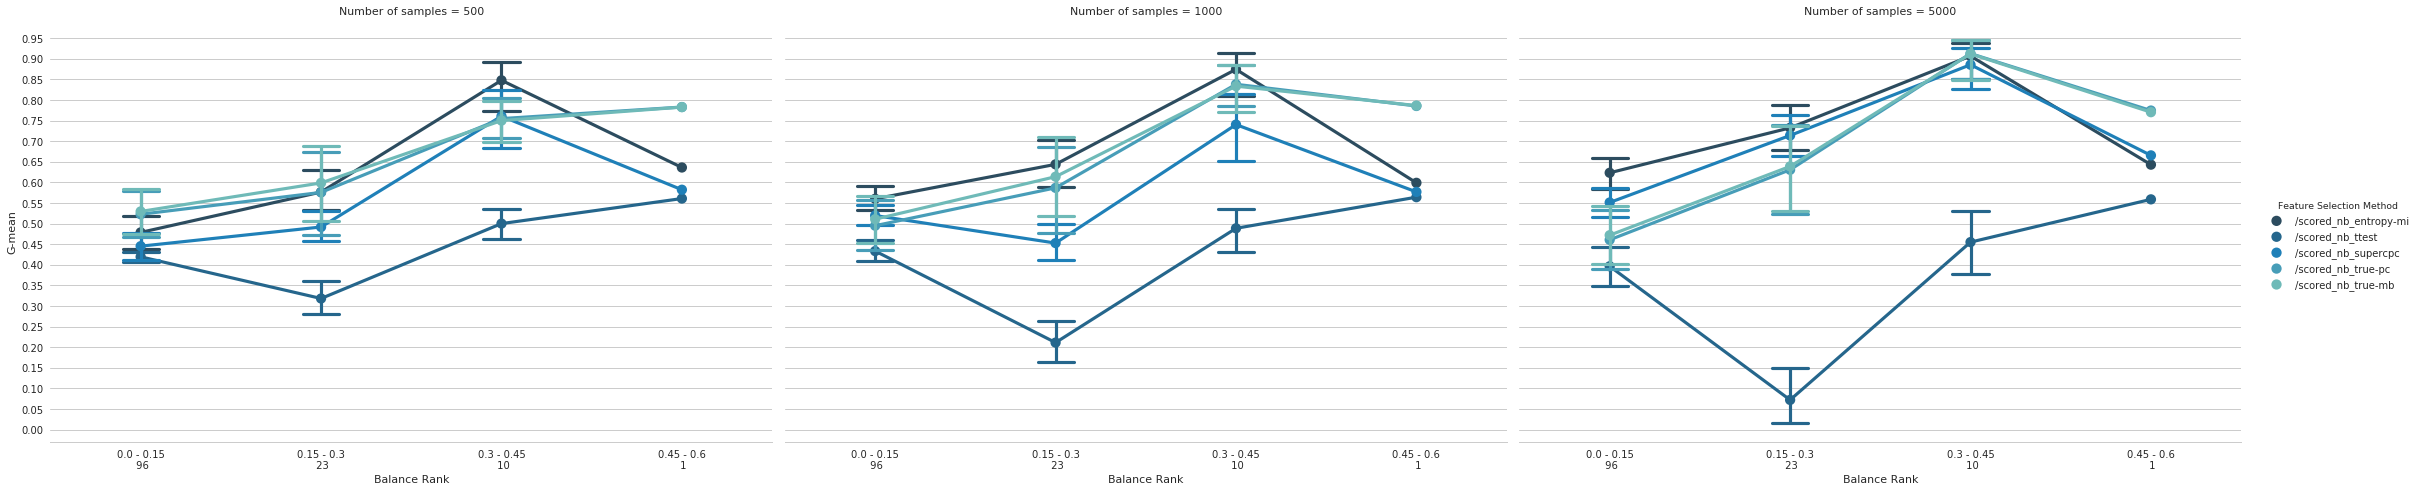

In [114]:
# processing and making graphic of results

%matplotlib inline
"""
Plotting a three-way ANOVA
==========================

_thumb: .42, .5
"""
import seaborn as sns
sns.set(style="whitegrid")

# Creating the df
df = pd.DataFrame(columns=["Balance Rank", "G-mean","Feature Selection Method","Number of samples"])

# sumarizing data for intervals of 0.25

ticks_step = 0.15
step_top = 0.60

steps_arr = np.arange(0.0,step_top,ticks_step)

size_label = []

for i in range(0,len(steps_arr)):
    #print(steps_arr[i])
    size_label.append(len([x for x in balance_ranking 
                           if x[0]==recovery_files[0].split('_log')[0] 
                           and x[1]==sample_sizes[2]
                           and (x[3]>=steps_arr[i]  and x[3] < steps_arr[i]+ticks_step)]))

#print(size_label)
for e in balance_ranking:
    # calculating which range it is in
    b_rank_counter=0
    for b_counter in range(0,len(steps_arr)):
        if ((steps_arr[b_counter]+ticks_step)>e[3]):
            break
        b_rank_counter=b_rank_counter+1
    
    df = df.append({
             "Balance Rank":str(math.ceil(100*steps_arr[b_rank_counter])/100) +
                                ' - ' + 
                            str(math.ceil(100*(steps_arr[b_rank_counter]+ticks_step))/100)+
                            '\n '+str(size_label[b_rank_counter]), 
            "G-mean":e[4],
            "Feature Selection Method":e[0],
            "Number of samples":int(e[1].split('s')[1])
              }, ignore_index=True)
# Draw a pointplot to show pulse as a function of three categorical factors
sns.set_color_codes("pastel")
g = sns.factorplot(x="Balance Rank", y="G-mean", hue="Feature Selection Method",
                   col="Number of samples", data=df,
                   capsize=.2, palette="YlGnBu_d", size=7, aspect=1.5)

g.despine(left=True)

g.set(yticks=np.arange(0.0,1.0,0.05))

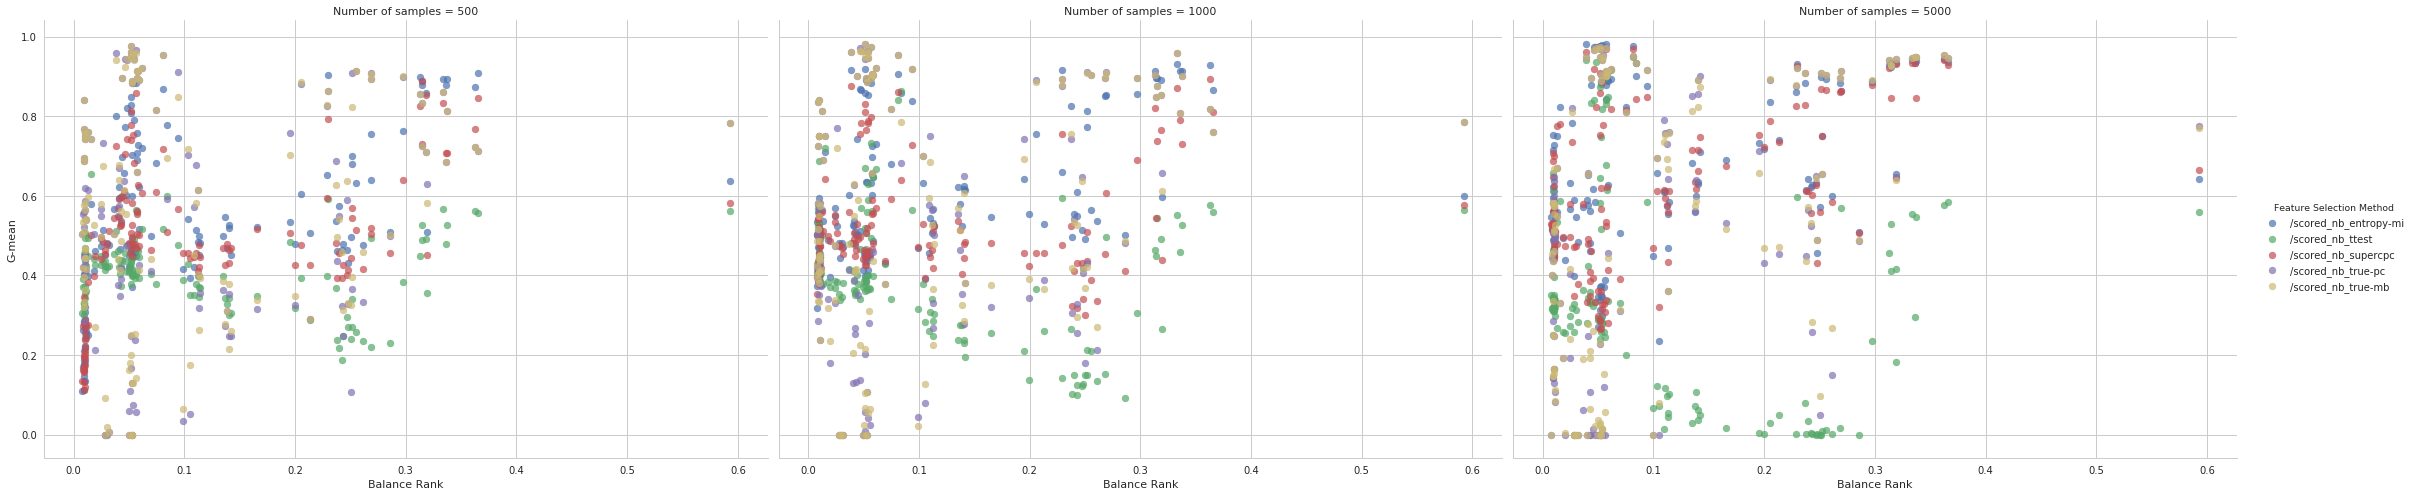

In [117]:
%matplotlib inline

# Creating the df
b_plot_df = pd.DataFrame(columns=["Balance Rank","G-mean","Feature Selection Method","Number of samples"])

#print(size_label)
for e in balance_ranking:
    # calculating which range it is in
    b_plot_df = b_plot_df.append({
            "Balance Rank":e[3], 
            "G-mean":e[4],
            "Feature Selection Method":e[0],
            "Number of samples":int(e[1].split('s')[1])
              }, ignore_index=True)
# Draw a pointplot to show pulse as a function of three categorical factors
sns.set_color_codes("pastel")
g = sns.FacetGrid(b_plot_df, col="Number of samples", hue="Feature Selection Method", size=7, aspect=1.5)
g.map(plt.scatter, "Balance Rank", "G-mean", alpha=.7)
g.add_legend()

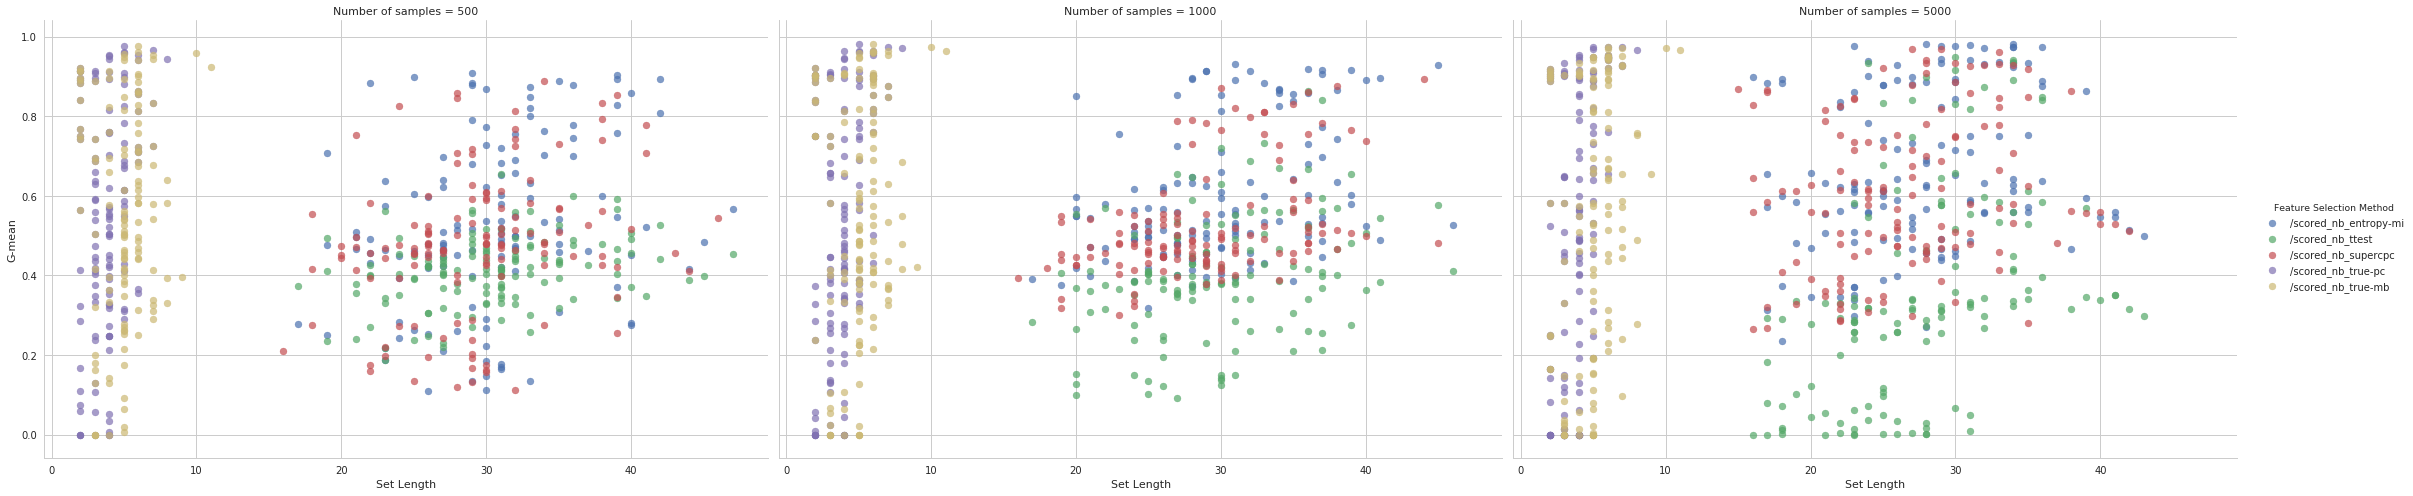

In [111]:
%matplotlib inline

# Creating the df
plot_df = pd.DataFrame(columns=["Set length","G-mean","Feature Selection Method","Number of samples"])

#print(size_label)
for e in set_length_ranking:
    # calculating which range it is in
    plot_df = plot_df.append({
            "Set Length":e[3], 
            "G-mean":e[4],
            "Feature Selection Method":e[0],
            "Number of samples":int(e[1].split('s')[1])
              }, ignore_index=True)
# Draw a pointplot to show pulse as a function of three categorical factors
sns.set_color_codes("pastel")
g = sns.FacetGrid(plot_df, col="Number of samples", hue="Feature Selection Method", size=7, aspect=1.5)
g.map(plt.scatter, "Set Length", "G-mean", alpha=.7)
g.add_legend()

In [6]:
def balance_scoring(size1, size2):
    f_size1 = float(size1)
    f_size2 = float(size2)
    if (f_size1/f_size2 <= 1):
        return f_size1/f_size2
    else:
        return f_size2/f_size1

In [7]:
def g_mean(precision_arr):
    counter=1
    for e in precision_arr:
        counter=counter*e[2]
    
    return counter**(1/len(precision_arr))